In [1]:
# import library
import os
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img

In [2]:
# Define the training and validation base directories
train_dir = 'D:\\ds_256x256_1000_split_7_2_1\\train'
validation_dir = 'D:\\ds_256x256_1000_split_7_2_1\\val'

In [3]:
class_names = sorted(os.listdir(train_dir))
print(class_names)

['ant', 'bear', 'bee', 'beetle', 'buffalo', 'butterfly', 'camel', 'cat', 'caterpillar', 'centipede', 'chameleon', 'cheetah', 'chicken', 'cockroach', 'cow', 'crab', 'crocodile', 'deer', 'dog', 'dolphin', 'dragonfly', 'duck', 'eagle', 'echidna', 'eel', 'elephant', 'flamingo', 'fly', 'fox', 'frog', 'giraffe', 'goldfish', 'goose', 'gorilla', 'grasshopper', 'hamster', 'harborseal', 'hedgehog', 'hippopotamus', 'horse', 'hyena', 'iguana', 'jaguar', 'jellyfish', 'kangaroo', 'killerwhale', 'koala', 'komodo', 'leopard', 'lion', 'lionfish', 'lizard', 'llama', 'monkey', 'mosquito', 'moth', 'mouse', 'orangutan', 'ostrich', 'otter', 'owl', 'panda', 'parrot', 'peacock', 'penguin', 'pig', 'platypus', 'polarbear', 'rabbit', 'raccoon', 'rhinoceros', 'salamander', 'scorpion', 'searays', 'seaturtle', 'seaurchins', 'shark', 'sheep', 'slug', 'snail', 'snake', 'spider', 'squirrel', 'starfish', 'swan', 'tiger', 'turtle', 'whale', 'wolf', 'zebra']


In [4]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    train_datagen = ImageDataGenerator(rescale = 1./255.,
                                       rotation_range = 20,
                                       width_shift_range = 0.2,
                                       height_shift_range = 0.2,
                                       shear_range = 0.2,
                                       zoom_range = 0.2,
                                       horizontal_flip = True)
    
    train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32, 
                                                      class_mode='categorical',
                                                      target_size=(256, 256))
    
    validation_datagen = ImageDataGenerator(rescale = 1./255.)
    
    validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32, 
                                                                class_mode='categorical',
                                                                target_size=(256, 256))
    return train_generator, validation_generator

In [5]:
train_generator, validation_generator = train_val_generators(train_dir, validation_dir)

Found 63000 images belonging to 90 classes.
Found 18000 images belonging to 90 classes.


In [6]:
import urllib.request

url = 'https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
filename = 'D:\\New folder\\inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

urllib.request.urlretrieve(url, filename)

('D:\\New folder\\inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5',
 <http.client.HTTPMessage at 0x293b92b1820>)

In [7]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = 'D:\\New folder\\inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'


In [8]:
def create_pre_trained_model(local_weights_file):
    pre_trained_model = InceptionV3(input_shape = (256, 256, 3),
                                    include_top = False, 
                                    weights = None)
    
    pre_trained_model.load_weights(local_weights_file)
    
    for layer in pre_trained_model.layers:
        layer.trainable = False
        
    return pre_trained_model

In [9]:
pre_trained_model = create_pre_trained_model(local_weights_file)

pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

 batch_normalization_5 (BatchNo  (None, 29, 29, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 29, 29, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 29, 29, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 29, 29, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 29, 29, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 29, 29, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 29, 29, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 29, 29, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 14, 14, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 14, 14, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 14, 14, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 14, 14, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 14, 14, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 14, 14, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 14, 14, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 14, 14, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 14, 14, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 14, 14, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 14, 14, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 14, 14, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 14, 14, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 14, 14, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 14, 14, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 14, 14, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 14, 14, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 14, 14, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 14, 14, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 14, 14, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 6, 6, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 6, 6, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 6, 6, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 6, 6, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 6, 6, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 6, 6, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 6, 6, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 6, 6, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 6, 6, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [10]:
total_params = pre_trained_model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in pre_trained_model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 21,802,784 total parameters in this model.
There are 0 trainable parameters in this model.


In [11]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.999):
            print("\nReached 99.99% accuracy so cancelling training!")
            self.model.stop_training = True

In [12]:
def output_of_last_layer(pre_trained_model):
    last_desired_layer = pre_trained_model.get_layer('mixed7')
    print('last layer output shape: ', last_desired_layer.output_shape)
    
    last_output = last_desired_layer.output
    print('last layer output: ', last_output)
    return last_output

In [13]:
last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 14, 14, 768)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 14, 14, 768), dtype=tf.float32, name=None), name='mixed7/concat:0', description="created by layer 'mixed7'")


In [14]:
print(f"The pretrained model has type: {type(pre_trained_model)}")

The pretrained model has type: <class 'keras.engine.functional.Functional'>


In [15]:
def create_final_model(pre_trained_model, last_output):
    x = layers.Flatten()(last_output)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(90, activation='softmax')(x)
    
    model = Model(inputs=pre_trained_model.input, outputs=x)
    model.compile(optimizer = RMSprop(learning_rate=0.0001),
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy',])
    return model

In [16]:
model = create_final_model(pre_trained_model, last_output)

total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 163,209,210 total parameters in this model.
There are 154,233,946 trainable parameters in this model.


In [ ]:
train_steps = len(train_generator) // 32
validation_steps = len(validation_generator) // 32
callbacks = myCallback()
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    steps_per_epoch=train_steps,
                    epochs = 100,
                    verbose = 2,
                    validation_steps=validation_steps,
                    callbacks=callbacks)

Epoch 1/100
61/61 - 295s - loss: 4.1824 - accuracy: 0.1163 - val_loss: 3.2527 - val_accuracy: 0.2390 - 295s/epoch - 5s/step
Epoch 2/100
61/61 - 271s - loss: 3.1492 - accuracy: 0.2664 - val_loss: 2.4358 - val_accuracy: 0.4173 - 271s/epoch - 4s/step
Epoch 3/100
61/61 - 247s - loss: 2.6183 - accuracy: 0.3678 - val_loss: 1.8805 - val_accuracy: 0.4963 - 247s/epoch - 4s/step
Epoch 4/100
61/61 - 252s - loss: 2.2048 - accuracy: 0.4457 - val_loss: 1.6344 - val_accuracy: 0.5754 - 252s/epoch - 4s/step
Epoch 5/100
61/61 - 262s - loss: 2.0021 - accuracy: 0.4980 - val_loss: 1.4431 - val_accuracy: 0.6324 - 262s/epoch - 4s/step
Epoch 6/100
61/61 - 269s - loss: 1.8938 - accuracy: 0.4959 - val_loss: 1.3704 - val_accuracy: 0.6213 - 269s/epoch - 4s/step
Epoch 7/100
61/61 - 243s - loss: 1.7604 - accuracy: 0.5384 - val_loss: 1.3371 - val_accuracy: 0.6232 - 243s/epoch - 4s/step
Epoch 8/100
61/61 - 258s - loss: 1.6406 - accuracy: 0.5712 - val_loss: 1.1074 - val_accuracy: 0.7040 - 258s/epoch - 4s/step
Epoch 9/

#train model

train_steps = len(train_generator) // 32
validation_steps = len(validation_generator) // 32

history = model.fit(train_generator,
                    validation_data = validation_generator,
                    steps_per_epoch=train_steps,
                    epochs = 30,
                    verbose = 2,
                    validation_steps=validation_steps,
                    callbacks=callbacks)



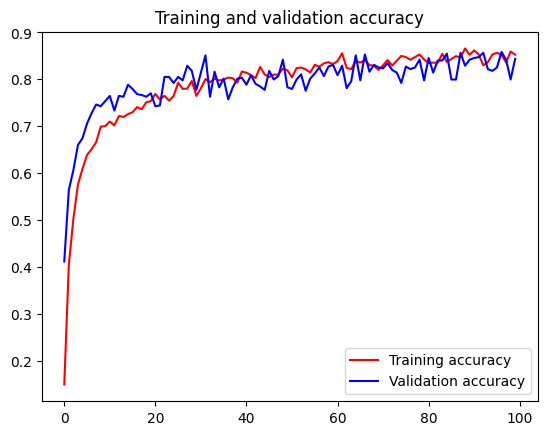

<Figure size 640x480 with 0 Axes>

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [24]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Define the image size and batch size
image_size = (256, 256)
batch_size = 32

# Define the path to the validation directory
val_dir = 'D:\\ds_256x256_1000_split_7_2_1\\val'
test_dir = 'D:\\ds_256x256_1000_split_7_2_1\\test'

# Create an image dataset from the validation directory
val_data = image_dataset_from_directory(
    directory=val_dir,
    labels='inferred',
    batch_size=batch_size,
    image_size=image_size
)

# Create an image dataset from the test directory
test_data = image_dataset_from_directory(
    directory=test_dir,
    labels='inferred',
    batch_size=batch_size,
    image_size=image_size
)

Found 18000 files belonging to 90 classes.
Found 8999 files belonging to 90 classes.


In [37]:
class_list = test_data.class_names
print(class_list)

['ant', 'bear', 'bee', 'beetle', 'buffalo', 'butterfly', 'camel', 'cat', 'caterpillar', 'centipede', 'chameleon', 'cheetah', 'chicken', 'cockroach', 'cow', 'crab', 'crocodile', 'deer', 'dog', 'dolphin', 'dragonfly', 'duck', 'eagle', 'echidna', 'eel', 'elephant', 'flamingo', 'fly', 'fox', 'frog', 'giraffe', 'goldfish', 'goose', 'gorilla', 'grasshopper', 'hamster', 'harborseal', 'hedgehog', 'hippopotamus', 'horse', 'hyena', 'iguana', 'jaguar', 'jellyfish', 'kangaroo', 'killerwhale', 'koala', 'komodo', 'leopard', 'lion', 'lionfish', 'lizard', 'llama', 'monkey', 'mosquito', 'moth', 'mouse', 'orangutan', 'ostrich', 'otter', 'owl', 'panda', 'parrot', 'peacock', 'penguin', 'pig', 'platypus', 'polarbear', 'rabbit', 'raccoon', 'rhinoceros', 'salamander', 'scorpion', 'searays', 'seaturtle', 'seaurchins', 'shark', 'sheep', 'slug', 'snail', 'snake', 'spider', 'squirrel', 'starfish', 'swan', 'tiger', 'turtle', 'whale', 'wolf', 'zebra']


In [19]:
#test model
test_loss, test_acc = model.evaluate(train_generator)
print('Test accuracy:', test_acc)

1969/1969 [==============================] - 2480s 1s/step - loss: 0.4851 - accuracy: 0.8699
Test accuracy: 0.8699206113815308


In [20]:
export_dir = 'D:\\New folder (2)'

tf.saved_model.save(model, export_dir=export_dir)

INFO:tensorflow:Assets written to: D:\New folder (2)\assets


INFO:tensorflow:Assets written to: D:\New folder (2)\assets


In [23]:
#filepath = 'D:\\Testing model'
#model.save(filepath, save_format="h5")

model.save('my_model.h5')

In [24]:
optimization = tf.lite.Optimize.DEFAULT

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_model = converter.convert()

In [27]:
import pathlib
tflite_model_file = pathlib.Path('./model.tflite')
tflite_model_file.write_bytes(tflite_model)

163376944